In [1]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# 2
plt.style.use('ggplot')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# 3
url = "https://raw.githubusercontent.com/jaihyun92/sentiment/main/dataset.csv"
df=pd.read_csv(url)






In [4]:
# 4 
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# 5
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
# 6 
df.shape

(500, 10)

In [7]:
# 7
df['Score'].value_counts().sort_index()

1     36
2     18
3     37
4     70
5    339
Name: Score, dtype: int64

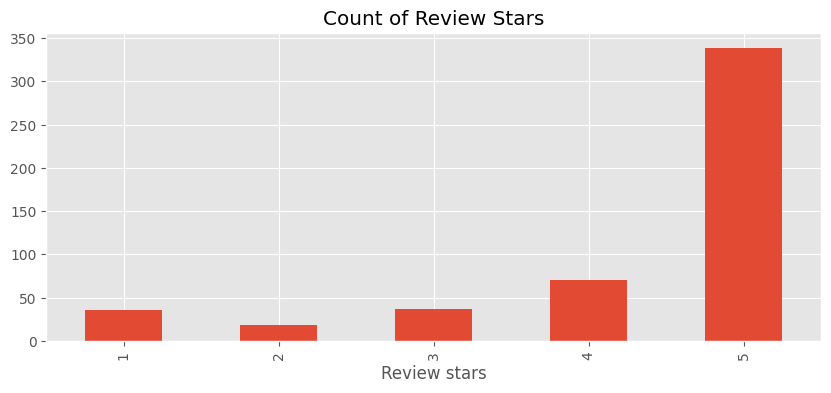

In [8]:
# 8
ax=df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Review Stars', figsize=(10,4))
ax.set_xlabel('Review stars')
plt.show()

In [9]:
# 9
example=df['Text'][82]
print(example)

I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer.  I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  You will have to play with the ratios - I would not do just the heavy cream, it made the coffee too rich. Also, 

In [10]:
# 10
tokens=nltk.word_tokenize(example)

In [11]:
# 11
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('know', 'VBP'),
 ('the', 'DT'),
 ('product', 'NN'),
 ('title', 'NN'),
 ('says', 'VBZ'),
 ('Molecular', 'NNP'),
 ('Gastronomy', 'NNP'),
 (',', ','),
 ('but', 'CC')]

In [12]:
# 12

nltk.download('maxent_ne_chunker')
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  I/PRP
  know/VBP
  the/DT
  product/NN
  title/NN
  says/VBZ
  (PERSON Molecular/NNP Gastronomy/NNP)
  ,/,
  but/CC
  do/VBP
  n't/RB
  let/VB
  that/DT
  scare/VB
  you/PRP
  off/RP
  ./.
  I/PRP
  have/VBP
  been/VBN
  looking/VBG
  for/IN
  this/DT
  for/IN
  a/DT
  while/NN
  now/RB
  ,/,
  not/RB
  for/IN
  food/NN
  science/NN
  ,/,
  but/CC
  for/IN
  something/NN
  more/RBR
  down/RB
  to/TO
  earth/NN
  ./.
  I/PRP
  use/VBP
  it/PRP
  to/TO
  make/VB
  my/PRP$
  own/JJ
  coffee/NN
  creamer./NN
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  have/VBP
  to/TO
  have/VB
  my/PRP$
  coffee/NN
  blonde/NN
  and/CC
  sweet/JJ
  -/:
  but/CC
  the/DT
  flavored/JJ
  creamers/NNS
  are/VBP
  full/JJ
  of/IN
  the/DT
  bad/JJ
  kinds/NNS
  of/IN
  fat/NN
  ,/,
  and/CC
  honestly/RB
  ,/,
  I/PRP
  hate/VBP
  to/TO
  use/VB
  manufactured/JJ
  ``/``
  food/NN
  ''/''
  items/NNS
  ./.
  I/PRP
  really/RB
  do/VBP
  n't/RB
  think/VB
  they/PRP
  are/VBP


#VADER Sentiment Analysis

In [ ]:
#bag of words approach

In [13]:
# 13

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [14]:
# 14

nltk.download('vader_lexicon')
sia= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
# 15

sia.polarity_scores('jUST BAD, CANNOT SAY ANYTHING MORE. BAD.')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.8579}

In [16]:
 # 16
 
 #running polarity score on the entire dataset
 res={}
 for i,row in tqdm(df.iterrows(),total=len(df)):
   text=row['Text']
   myid=row['Id']
   res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
# 17

vaders=pd.DataFrame(res).T
print(vaders)

       neg    neu    pos  compound
1    0.000  0.695  0.305    0.9441
2    0.138  0.862  0.000   -0.5664
3    0.091  0.754  0.155    0.8265
4    0.000  1.000  0.000    0.0000
5    0.000  0.552  0.448    0.9468
..     ...    ...    ...       ...
496  0.000  0.554  0.446    0.9725
497  0.059  0.799  0.142    0.7833
498  0.025  0.762  0.212    0.9848
499  0.041  0.904  0.055    0.1280
500  0.000  0.678  0.322    0.9811

[500 rows x 4 columns]


In [18]:
# 18

vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df, how='left')

In [19]:
# 19

vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [20]:
# 20


vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#Plotting vader results

Text(0.5, 1.0, 'Compound Score v/s Amazon Star Review')

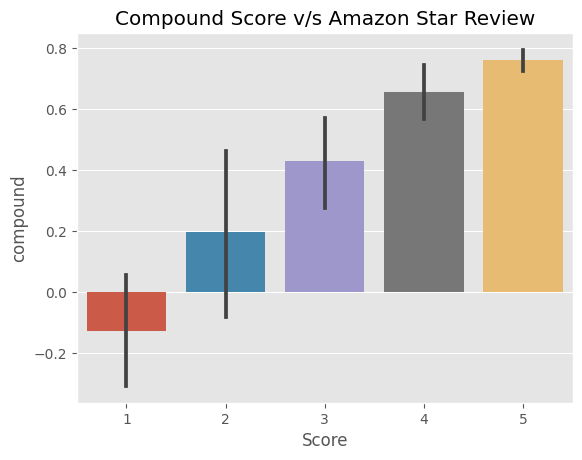

In [21]:
# 21

ax=sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score v/s Amazon Star Review')

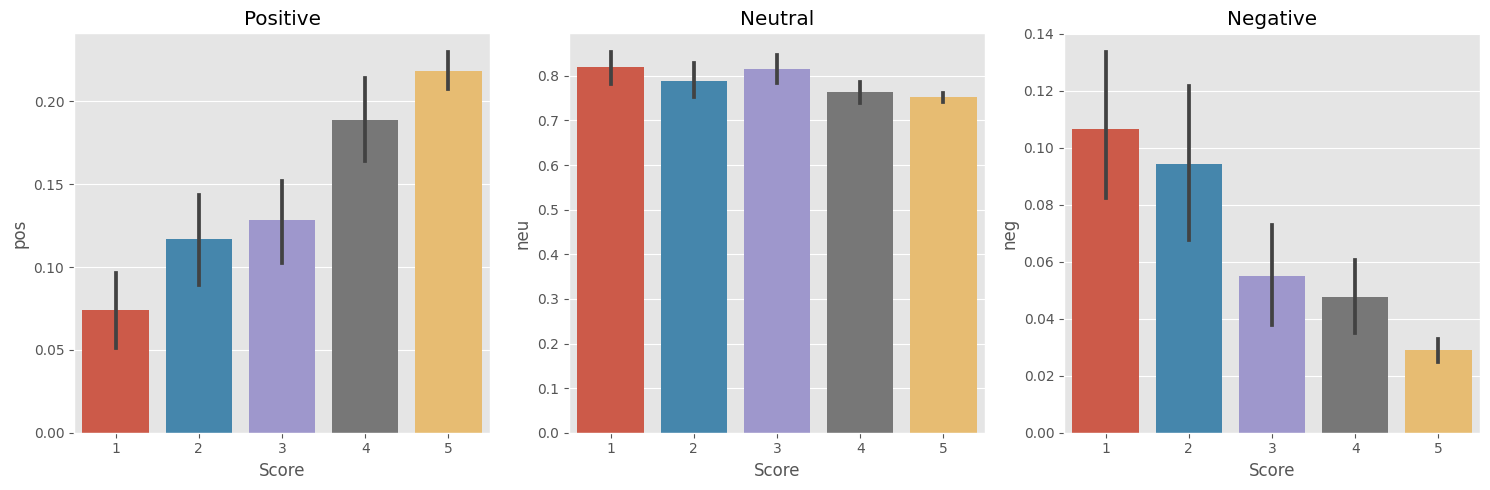

In [22]:
# 22

fig,axs=plt.subplots(1,3,figsize=(15,5))

sns.barplot(data=vaders, x='Score', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

#ROBERTA Pretrained Model Method

In [25]:
# 23

!pip install git+https://github.com/huggingface/transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-t2gmq44l
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-t2gmq44l
  Resolved https://github.com/huggingface/transformers to commit 656e869a4523f6a0ce90b3aacbb05cc8fb5794bb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 15.0 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.28.0.dev0-py3-none-any.whl size=6895957 sha256=1f501171a1d3d05881670748fc6933e4e1dc0d856e51e84a1802f26c09f1a586
  Stored in directory: /tmp/pip-ephem-wheel-cache-cp7bc4ir/wheels/14/a0/7b/8f6b25ba4110aa215fcb8d6aedd6cd4f9b9b6619190

In [26]:
# 24

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
# 25
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [28]:
# 26

print(example)
sia.polarity_scores(example)

I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer.  I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  You will have to play with the ratios - I would not do just the heavy cream, it made the coffee too rich. Also, 

{'neg': 0.04, 'neu': 0.794, 'pos': 0.165, 'compound': 0.9957}

In [29]:
# 27

# encoded_text=tokenizer(example,return_tensors='pt')
# output=model(**encoded_text)
# scores=output[0][0].detach().numpy()
# scores=softmax(scores)
# scores_dict={
#     'roberta_neg':scores[0],
#     'roberta_neu':scores[1],
#     'roberta_pos':scores[2]
# }

encoded_text = tokenizer(example, max_length=512, truncation=True, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}



In [30]:
# 28

scores_dict

{'roberta_neg': 0.24141213, 'roberta_neu': 0.45623988, 'roberta_pos': 0.302348}

In [32]:
 # 29
 
def polarity_scores_roberta(example):
      encoded_text=tokenizer(example, max_length=512, truncation=True, return_tensors='pt')
      output=model(**encoded_text)
      scores=output[0][0].detach().numpy()
      scores=softmax(scores)
      scores_dict={
          'roberta_neg':scores[0],
          'roberta_neu':scores[1],
          'roberta_pos':scores[2]
      }
      return scores_dict

In [33]:
# 30

res={}

for i, row in tqdm(df.iterrows(), total=len(df)):
  text=row['Text']
  myid=row['Id']
  vader_result=sia.polarity_scores(text)
  vader_result_rename={}
  for key,value in vader_result.items():
    vader_result_rename[f"vader_{key}"]=value
  roberta_result=polarity_scores_roberta(text)
  both={**vader_result_rename, **roberta_result}
  res[myid]=both

  0%|          | 0/500 [00:00<?, ?it/s]

In [34]:
# 31

results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df, how='left')

In [35]:
# 32

results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [36]:
# 33

results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

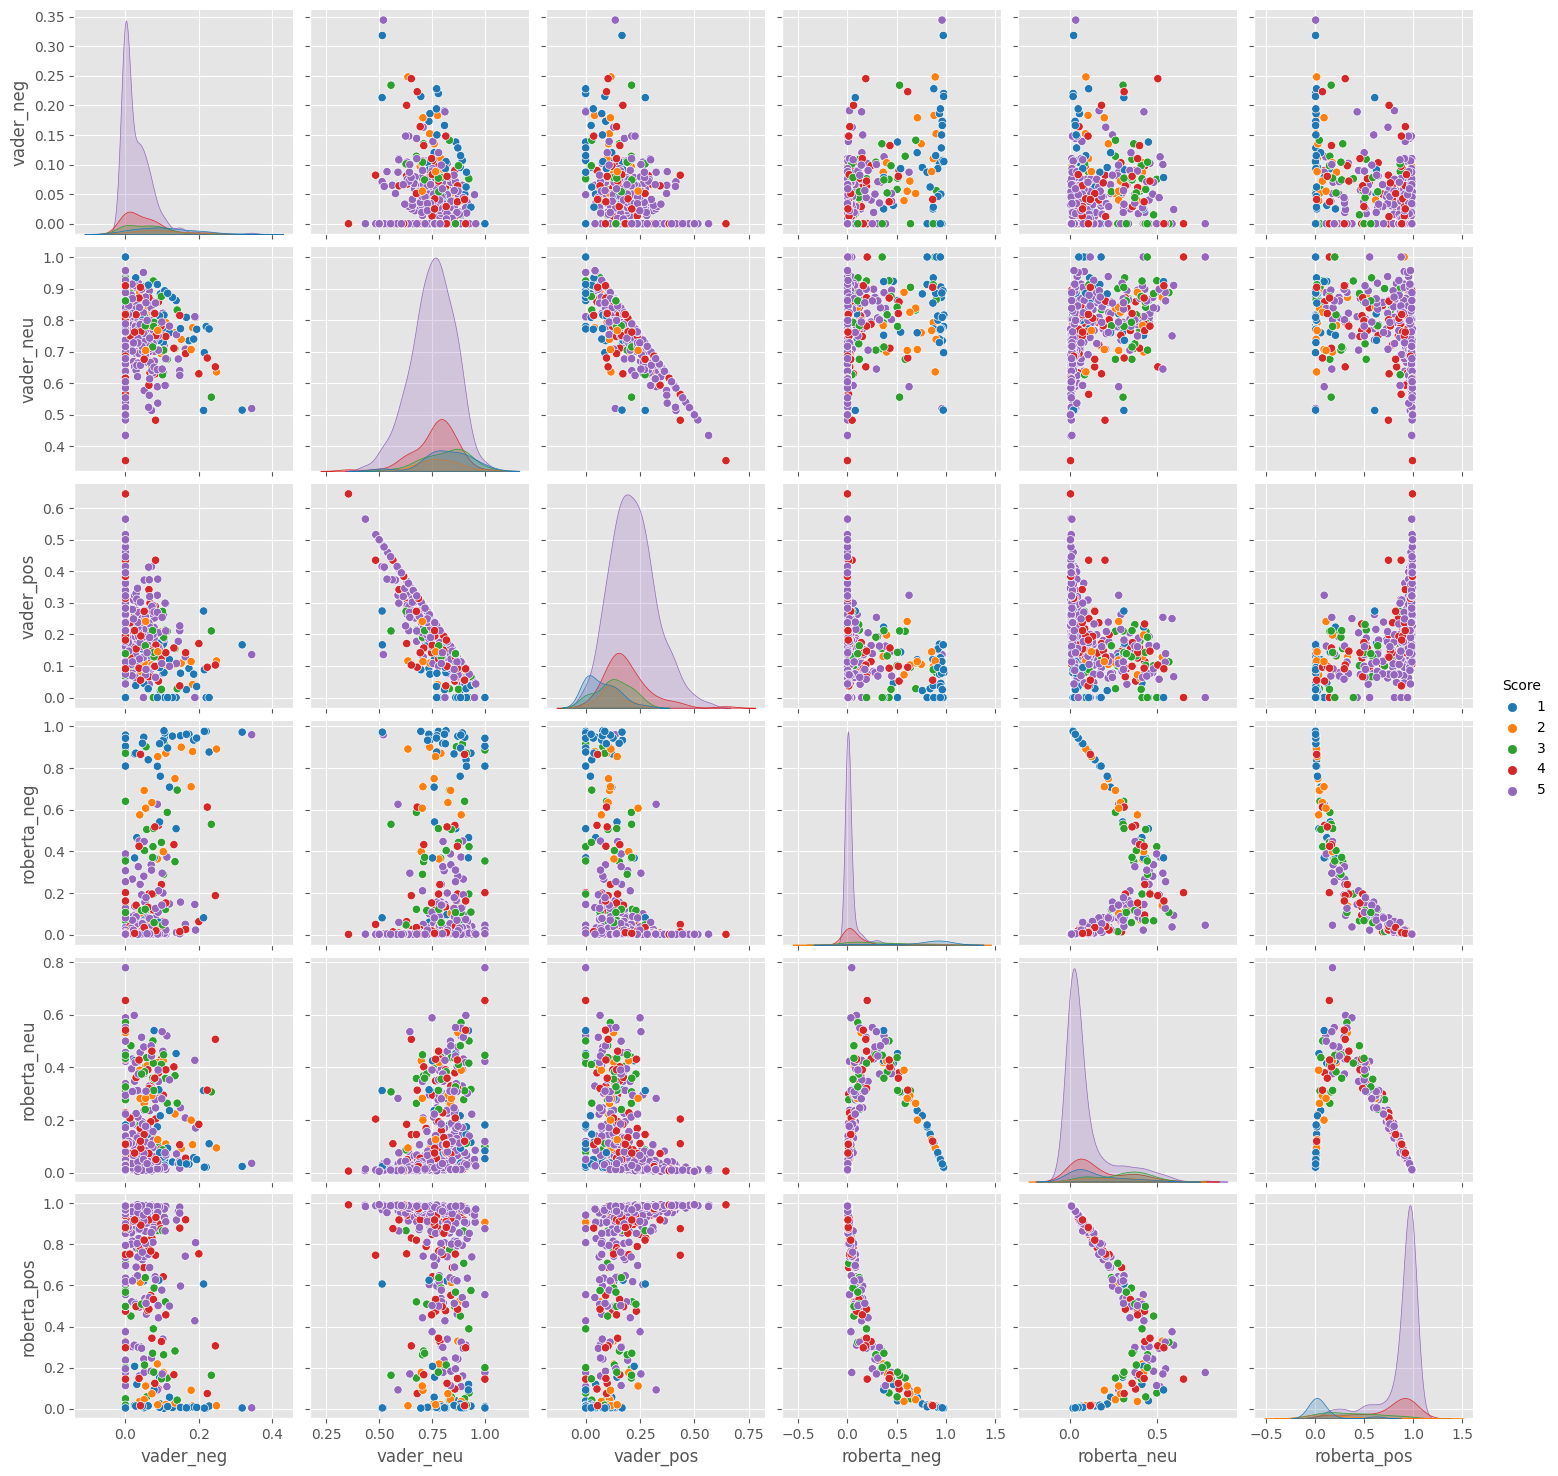

In [37]:
# 34

sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 
                                   'roberta_neu', 'roberta_pos' ],
             hue='Score',
             palette='tab10')

In [38]:
# 35

results_df.query('Score==1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [39]:
# 36

results_df.query('Score==1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [40]:
# 37

results_df.query('Score==5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [41]:
# 38

results_df.query('Score==5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'